In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

metrics = ['loss']
results_path = "/data/vision/polina/users/ramyamut/projects/mri_final_project/models/training_debug_alt/metrics.json"

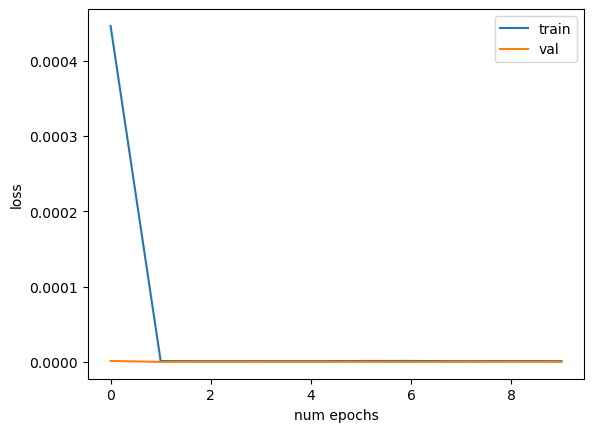

In [2]:
for metric in metrics:
    plt.figure()
    with open(results_path, 'r') as f:
        results = json.load(f)
    epochs = np.arange(len(results[f'train/{metric}']))
    metric_train = results[f'train/{metric}']
    metric_val = results[f'val/{metric}'][1:]
    plt.plot(epochs, metric_train)
    plt.plot(epochs, metric_val)
    plt.xlabel('num epochs')
    plt.ylabel(metric)
    plt.legend(['train', 'val'])
    plt.show()

/tmp/ipykernel_2977741/307347956.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  recon_real = imageio.imread(path_real) / 255
/tmp/ipykernel_2977741/307347956.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  recon_imag = imageio.imread(path_real) / 255
/tmp/ipykernel_2977741/307347956.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pred = imageio.imread(pred_path)


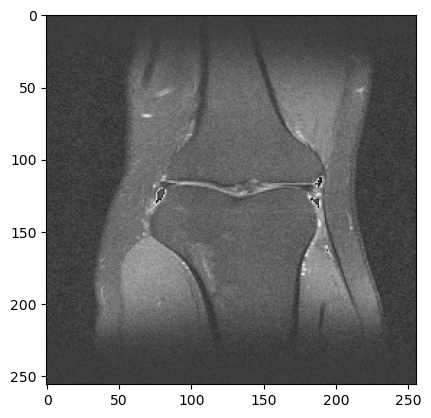

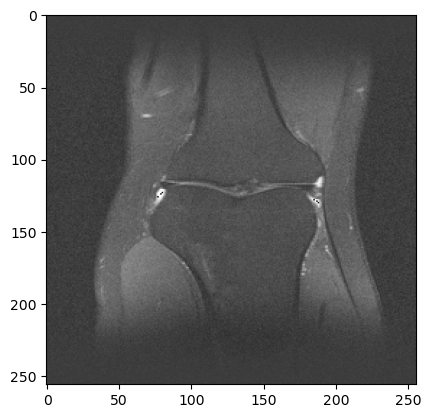

In [3]:
import imageio
import glob
import os

path_real = sorted(glob.glob("/data/vision/polina/users/ramyamut/projects/mri_final_project/data/singlecoil_val/preproc/recon_real/*.png"))[10]
recon_real = imageio.imread(path_real) / 255
path_imag = os.path.join("/data/vision/polina/users/ramyamut/projects/mri_final_project/data/singlecoil_val/preproc/recon_imag/", os.path.basename(path_real))
recon_imag = imageio.imread(path_real) / 255

recon = recon_real + 1j * recon_imag
recon_mag = abs(recon)
recon_mag = (recon_mag * 255).astype(np.uint8)

pred_path = os.path.join("/data/vision/polina/users/ramyamut/projects/mri_final_project/models/training_debug_alt/results/", os.path.basename(path_real))
pred = imageio.imread(pred_path)

plt.figure()
plt.imshow(recon_mag, cmap='gray')
plt.show()

plt.figure()
plt.imshow(pred, cmap='gray')
plt.show()